In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from lib_analytics import showInfoDataFrame, displaySideBySide

In [4]:
data_province_area = pd.read_csv('data_preprocessing/general_province_area.csv', index_col=0)
showInfoDataFrame(data_province_area)

(5103, 4)


,Ma_Tinh,Ten_Huyen,So_Diem_Chay,Nam
0,1,Thạch Thất,1,2011
1,1,Thạch Thất,1,2012
2,1,Thạch Thất,1,2013


In [7]:
data_nation_province = pd.read_csv('data_preprocessing/general_nation_province_year.csv', index_col=0)
showInfoDataFrame(data_nation_province)

(528, 3)


,Ma_Tinh,So_Diem_Chay,Nam
0,62,1460,2011
1,64,1082,2011
2,66,926,2011


In [9]:
df_province = pd.read_csv('data_preprocessing/Tinh_Forest.csv', index_col=0)
dict_province = {}
for index in range(df_province.shape[0]):
    row = df_province.iloc[index]
    dict_province[row.values[0]] = row.values[1]

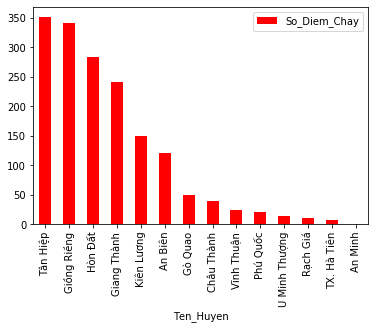

In [5]:
bar = data_province_area[(data_province_area.Ma_Tinh == 91) & (data_province_area.Nam == 2020)].sort_values(
    by=['So_Diem_Chay'],
    ascending=[0]
).plot.bar(
    x='Ten_Huyen', 
    y='So_Diem_Chay',
    color='red',
    rot=90
)
bar

<IPython.core.display.Javascript object>


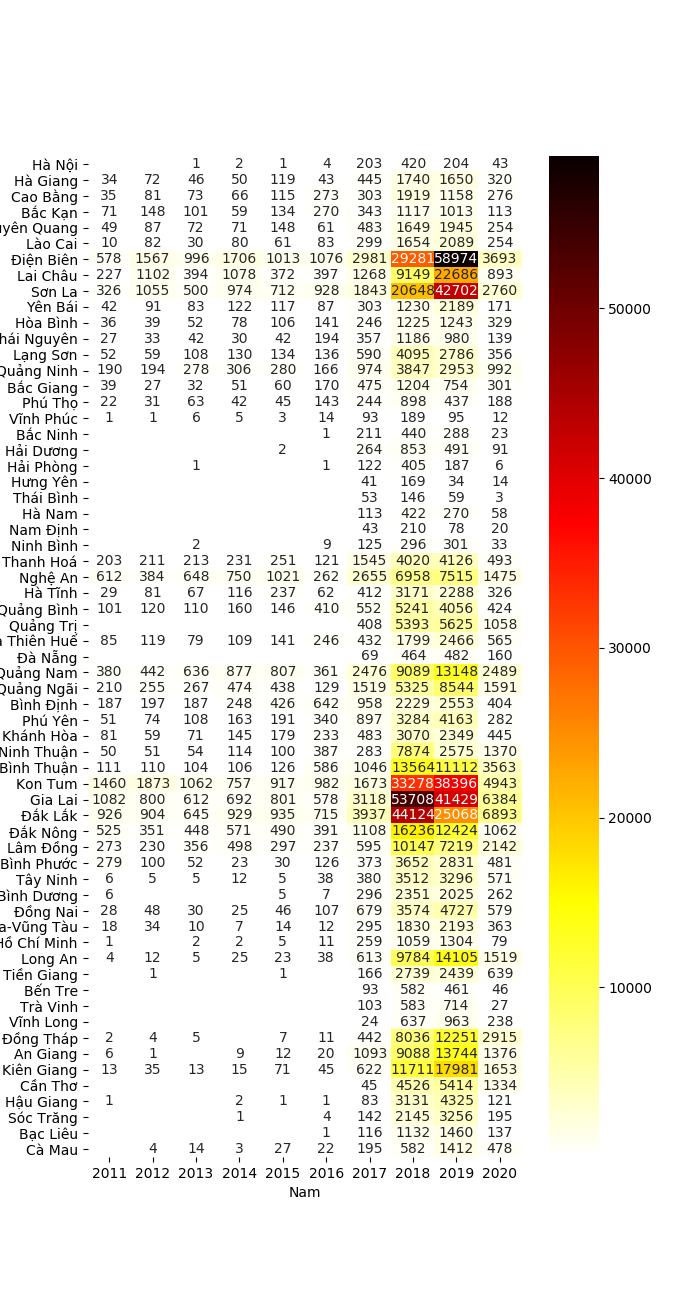

In [10]:
%matplotlib notebook
def on_click(event):
    data_province_area[(data_province_area.Ma_Tinh == 91) & (data_province_area.Nam == 2020)].sort_values(
        by=['So_Diem_Chay'],
        ascending=[0]
    ).plot.bar(
        x='Ten_Huyen', 
        y='So_Diem_Chay',
        color='red',
        rot=90
    )
    # tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    # text.set_text(tx)
    
data_pivot = data_nation_province.pivot(
    index='Ma_Tinh', 
    columns='Nam', 
    values='So_Diem_Chay'
)
data_pivot = data_pivot.rename(index=dict_province)
# print(data_pivot.index)
# -------
plt.figure(figsize=(8, 13))
ax = sb.heatmap(
    data_pivot,
    annot=True,
    fmt='1.0f',
    cmap='hot_r'
)
text = ax.text(0,0, "", va="bottom", ha="left")
ax.figure.canvas.mpl_connect('button_press_event', on_click)
plt.show()